In [1]:
import os, sys, json
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from collections import defaultdict
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
plt.style.use('ggplot')


def get_confidence_intervals_multivariate(mypath):

    # Get file path and files therein
    files = os.listdir(mypath)
    results = []

    # Load files
    for file in files:

        if file == '.DS_Store':
            continue

        with open("{}/{}".format(mypath, file)) as f:
            data = json.load(f)
        
        results.append(data)
        
    # Get values for best runs
    optimal = nested_pickle_dict()
    for result in results:
        for model, distributions in result.items():
            for distribution, metrics in distributions.items():
                for metric, values in metrics.items():
                    if metric not in optimal[model][distribution]:
                        optimal[model][distribution][metric] = {'values': [], "parameters": []}
                    
                    if metric not in ['DLoss', 'GLoss', "LR", "HDIM", "BSIZE"]:
                        optimal[model][distribution][metric]['values'].append(values['value'])
                        optimal[model][distribution][metric]["parameters"].append(values["parameters"])

    # Compute 5th and 95th percentiles for each epoch
    for result in results:
        for model, distributions in result.items():
            for distribution, metrics in distributions.items():
                for metric, values in metrics.items():
                    if metric not in ['DLoss', 'GLoss']:
                        data = np.column_stack(optimal[model][distribution][metric]['values'])
                        mean, _, low, high = mean_confidence_interval(data)
                        optimal[model][distribution][metric]['low'] = list(low)
                        optimal[model][distribution][metric]['mean'] = list(mean)
                        optimal[model][distribution][metric]['high'] = list(high)
                    
                        
    return optimal


def get_confidence_intervals_mnist(*args):
    """ Compute 95% confidence intervals for MNIST """
    return get_confidence_intervals_multivariate(*args)


def graph_mnist(optimal, distance_metrics=["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance"]):
    
    for dist in distance_metrics:

        for model_name in optimal.keys():

            if model_name in ['vae', 'autoencoder']:
                continue
                
            if len(optimal[model_name]['mnist'][dist]['mean']) == 0:
                pass
            else:
                
                plt.plot(range(len(optimal[model_name]['mnist'][dist]['mean'])), 
                         optimal[model_name]['mnist'][dist]['mean'], 
                         label=model_name)

                plt.xlabel("Epoch")
                plt.ylabel(dist)
                plt.title("{0}".format(dist))
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        #     plt.savefig('graphs/mnist/{1}.png'.format(dist), dpi=100)
        plt.show()
        
        
def graph_multivariate(optimal, 
                       distance_metrics=["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance"], 
                       distributions=['beta', 'gumbel', 'laplace', 'normal', 'exponential', 'gamma']):
    
    for metric in distance_metrics:

        for distribution in distributions:

            for model_name in optimal.keys():

                if model_name in ['vae', 'autoencoder']:
                    continue

                plt.plot(range(len(optimal[model_name][distribution][metric]['mean'])), 
                         optimal[model_name][distribution][metric]['mean'], 
                         label=model_name)

                plt.xlabel("Epoch")
                plt.title("{0}: {1}".format(metric, distribution))
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        #     plt.savefig('graphs/mnist/{1}.png'.format(dist), dpi=100)
            plt.show()

            
def mean_confidence_interval(data, axis=1, confidence=0.95):
    try:
        n = data.shape[axis]
    except IndexError:
        axis = 0
        n = data.shape[axis]
    mu, std = np.mean(data, axis=axis), scipy.stats.sem(data, axis=axis)
    h = std * scipy.stats.t.ppf((1 + confidence) / 2., n-1)        
    
    return mu, h, mu-h, mu+h


def nested_pickle_dict():
    """ Picklable defaultdict nested dictionaries """
    return defaultdict(nested_pickle_dict)

In [270]:
optimal = get_confidence_intervals_multivariate("/Users/sob/Desktop/gan_results/best/multivariate/16_dims_10000_samples/")

In [283]:
np.min(np.array(optimal['wgan']['normal']['KL-Divergence']['values']), axis=1)

array([0.87657412, 0.44547311, 0.51672873, 0.87466922, 0.37941314,
       0.59463701, 0.28036312, 0.45425549, 0.55070286, 0.32614602,
       0.33865412, 0.29257227, 0.28633212, 0.47103218, 0.29976007,
       0.57093249, 0.5335611 , 0.4135427 , 0.42892763, 0.21061797])

In [291]:
outs = []
for i in optimal['wgan']['normal']['KL-Divergence']['values']:
    for idx, val in enumerate(i):
        if val == min(i):
            outs.append((idx+1, val))

In [299]:
mean_confidence_interval(np.array([i[1] for i in outs]))

(0.4572447730474045, 0.37314064801465524, 0.5413488980801539)

In [297]:
np.array(min(optimal['wgan']['normal']['KL-Divergence']['values'])).shape[1]

IndexError: tuple index out of range

In [289]:
np.where(min(optimal['wgan']['normal']['KL-Divergence']['values'][-1]))

(array([0]),)

In [ ]:
for metric in distance_metrics:

    for distribution in distributions:

        for model_name in optimal.keys():
            
            

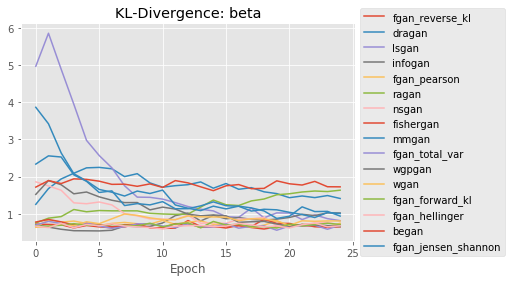

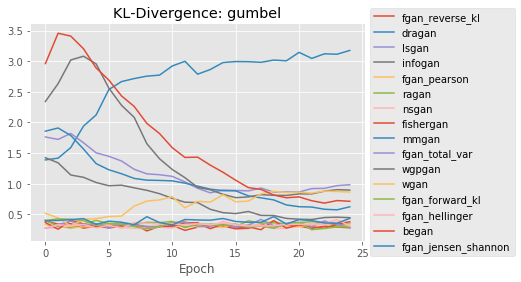

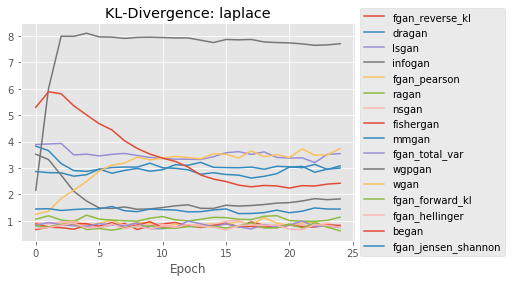

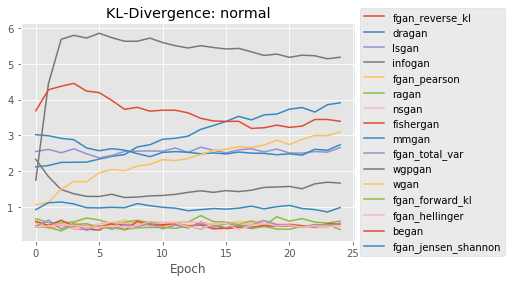

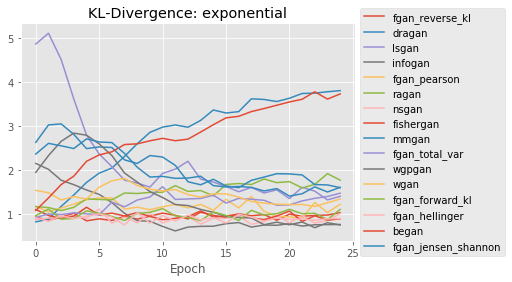

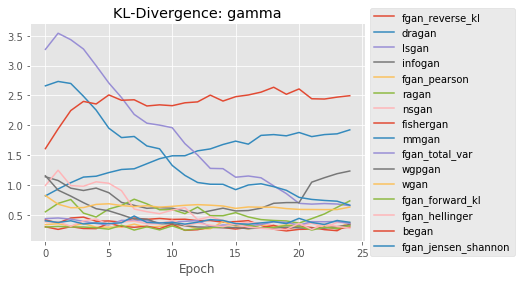

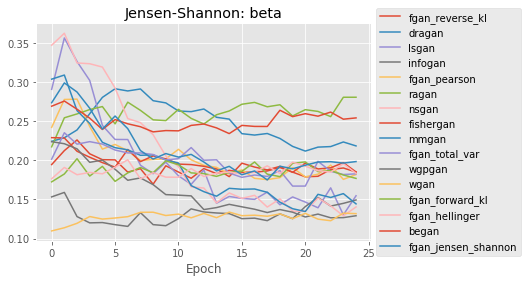

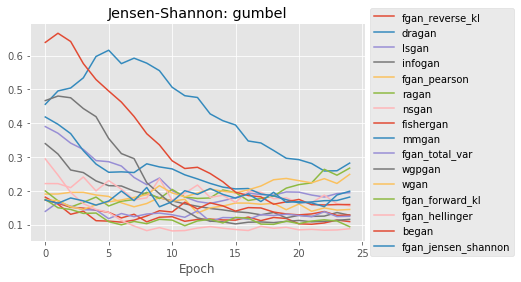

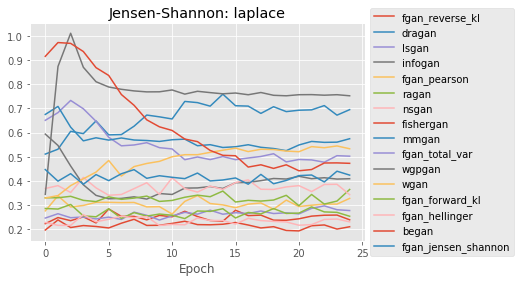

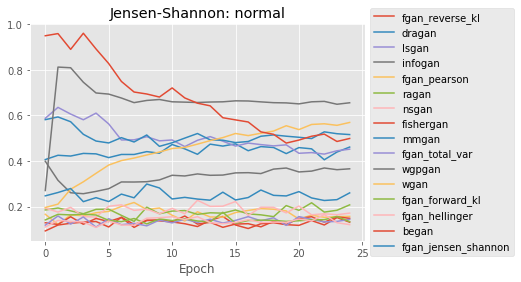

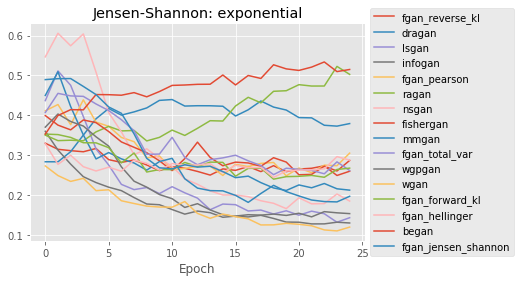

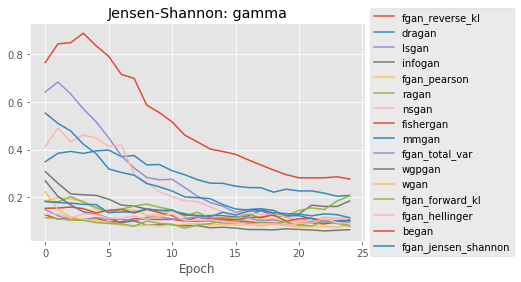

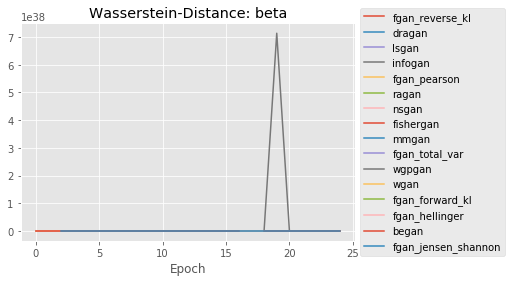

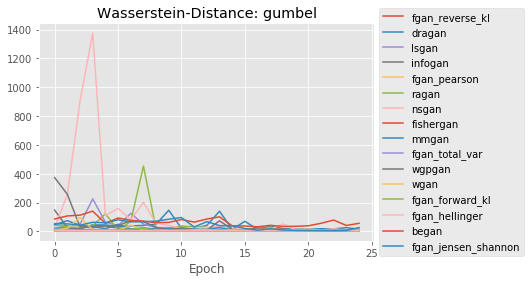

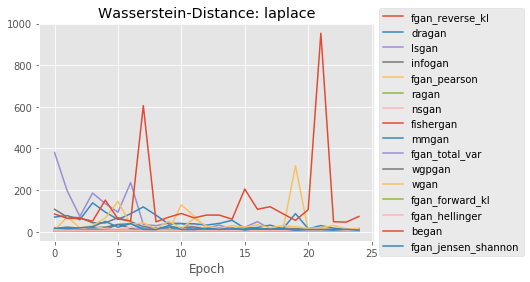

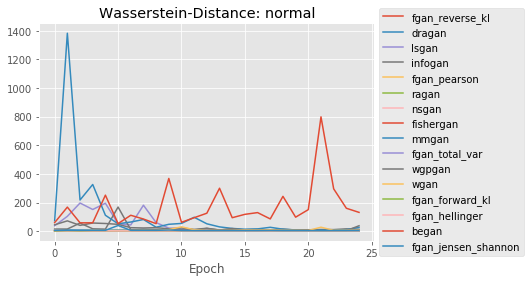

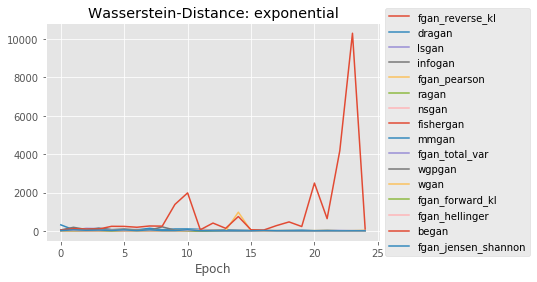

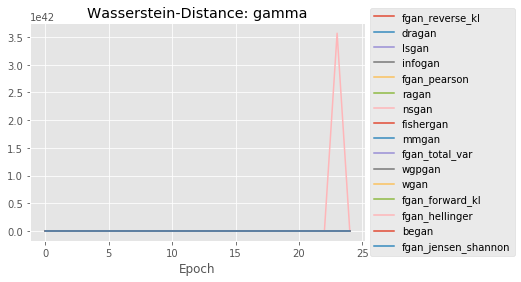

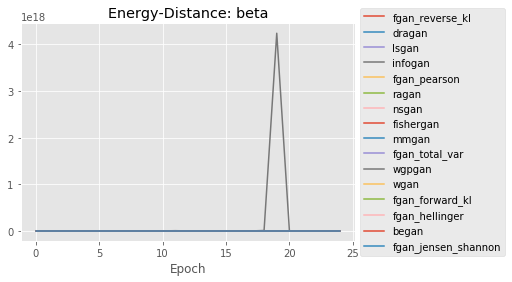

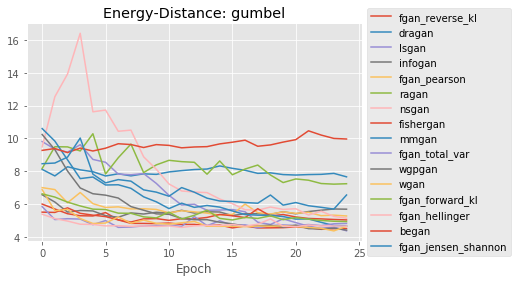

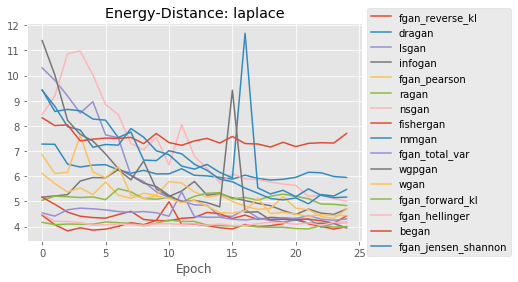

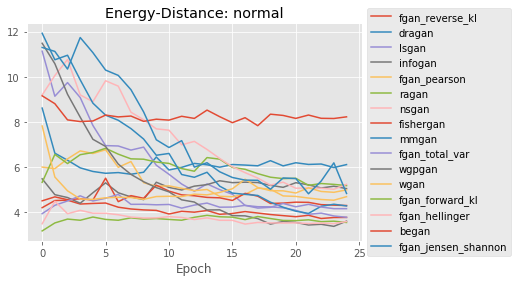

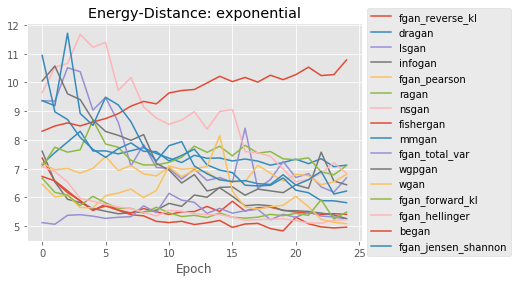

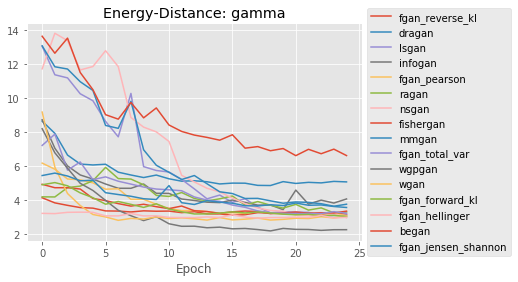

In [260]:
def graph_multivariate(optimal, 
                       distance_metrics=["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance"], 
                       distributions=['beta', 'gumbel', 'laplace', 'normal', 'exponential', 'gamma']):
    
    for metric in distance_metrics:

        for distribution in distributions:

            for model_name in optimal.keys():

                if model_name in ['vae', 'autoencoder']:
                    continue

                plt.plot(range(len(optimal[model_name][distribution][metric]['mean'])), 
                         optimal[model_name][distribution][metric]['mean'], 
                         label=model_name)

                plt.xlabel("Epoch")
                plt.title("{0}: {1}".format(metric, distribution))
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        #     plt.savefig('graphs/mnist/{1}.png'.format(dist), dpi=100)
            plt.show()

In [263]:
is_outlier(np.array(optimal['wgpgan']['beta']['Energy-Distance']['mean']))

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [267]:
np.array(optimal['infogan']['beta']['Energy-Distance']['mean'])

array([1.47175209e+01, 1.59748094e+01, 7.31117398e+11, 8.06872177e+04,
       1.45049008e+01, 1.13685633e+01, 1.12166250e+01, 1.03761500e+01,
       1.41445551e+05, 1.00717019e+01, 9.57876539e+00, 5.05194526e+15,
       1.03821775e+01, 9.32396300e+03, 1.01003445e+01, 1.11223571e+01,
       1.08578316e+01, 1.07548011e+01, 9.08630760e+15, 4.24112847e+18,
       1.03839353e+01, 2.54273447e+09, 8.06860126e+04, 1.16495938e+01,
       1.14969752e+01])

In [228]:
optimal[model_name][distribution][metric]['mean']

[6.411310132938763,
 2.8460834640281623,
 3.9263846200317944,
 13.432215909106013,
 2.6388402120309427,
 2.753099210125404,
 3.739240870930109,
 2.861901211813796,
 4.606482050376602,
 2.81740193189352,
 2.9368252089942457,
 2.210664131715108,
 3.8054173012168957,
 5.8634265167199775,
 3.4108507725433754,
 3.257547069637702,
 3.407522380644397,
 6.753949008145813,
 3.362887052110232,
 3.009883665663037]

In [207]:
optimal['wgan']['beta']['Jensen-Shannon']['parameters']

[[0.002, 64, 128],
 [0.002, 32, 128],
 [0.001, 128, 256],
 [0.002, 64, 128],
 [0.002, 32, 128],
 [0.002, 32, 128],
 [0.002, 32, 128],
 [0.001, 128, 256],
 [0.002, 64, 128],
 [0.002, 256, 128],
 [0.002, 32, 128],
 [0.001, 128, 256],
 [0.002, 128, 128],
 [0.002, 128, 128],
 [0.002, 128, 128],
 [0.002, 64, 128],
 [0.002, 128, 128],
 [0.002, 64, 128],
 [0.002, 128, 128],
 [0.002, 128, 128]]

In [177]:
for result in optimal[0:1]:
    for model, distributions in result.items():
        for distribution, metrics in distributions.items():
            for metric, values in metrics.items():
                print(result[model][distribution][metric]['parameters'])

[0.00025, 512, 1024]
[0.005, 512, 512]
[0.02, 256, 128]
[0.025, 32, 1024]
[0.0025, 64, 1024]
[0.02, 256, 128]
[0.002, 128, 128]
[0.0025, 32, 1024]
[0.002, 128, 128]
[0.0025, 128, 1024]
[0.0025, 64, 1024]
[0.0025, 128, 1024]
[0.002, 512, 128]
[0.05, 128, 512]
[0.001, 32, 256]
[0.0025, 64, 1024]
[0.0025, 64, 1024]
[0.001, 64, 256]
[0.001, 512, 256]
[0.0005, 512, 512]
[0.02, 256, 128]
[0.0025, 32, 1024]
[0.025, 256, 1024]
[0.001, 64, 256]
[0.2, 128, 128]
[0.0005, 256, 512]
[0.02, 256, 128]
[0.0025, 64, 1024]
[0.0025, 64, 1024]
[0.001, 32, 256]
[0.05, 128, 512]
[0.05, 256, 512]
[0.02, 256, 128]
[0.0025, 256, 1024]
[0.0025, 64, 1024]
[0.0025, 64, 1024]
[0.002, 512, 128]
[0.0025, 512, 1024]
[0.0025, 64, 1024]
[0.0025, 64, 1024]
[0.0025, 64, 1024]
[0.001, 256, 256]
[0.002, 512, 128]
[0.0005, 256, 512]
[0.02, 256, 128]
[0.0025, 64, 1024]
[0.025, 256, 1024]
[0.001, 128, 256]
[0.002, 128, 128]
[0.0005, 256, 512]
[0.01, 64, 256]
[0.00025, 512, 1024]
[0.025, 256, 1024]
[0.0005, 128, 512]
[0.2, 512

In [174]:
values

{'value': [1.3297982828656794,
  1.4678792548185207,
  1.38638526086028,
  1.674710308278548,
  1.0788238790162354,
  1.0977271002902655,
  0.7156697453313201,
  0.7323543157543361,
  0.605870864628378,
  0.7293161690563512,
  0.683178732670538,
  0.6432271936164203,
  0.6786260651067666,
  0.6427409572302801,
  0.644242174780028,
  0.6492604542331173,
  0.6631506825222273,
  0.6152580392592636,
  0.6611009916314838,
  0.6082673399344297,
  0.6643473066749593,
  0.6158819539733434,
  0.6437307813097749,
  0.6553341838819483,
  0.6195311679472185],
 'parameters': [0.005, 128, 512]}

In [170]:
metric

'Jensen-Shannon'

In [154]:
os.listdir("/Users/sob/Desktop/mnist_final/best/")

['trial_1.json',
 'trial_10.json',
 'trial_11.json',
 'trial_12.json',
 'trial_13.json',
 'trial_14.json',
 'trial_15.json',
 'trial_16.json',
 'trial_17.json',
 'trial_18.json',
 'trial_19.json',
 'trial_2.json',
 'trial_20.json',
 'trial_3.json',
 'trial_4.json',
 'trial_5.json',
 'trial_6.json',
 'trial_7.json',
 'trial_8.json',
 'trial_9.json']

In [139]:

for dist in ["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance"]:

    for model_name in optimal.keys():

        if model_name in ['vae', 'autoencoder']:
            continue

        if len(optimal[model_name]['mnist'][dist]['mean']) == 0:
            pass
        else:

            plt.plot(range(len(optimal[model_name]['mnist'][dist]['mean'])), 
                     optimal[model_name]['mnist'][dist]['mean'], 
                     label=model_name)

            plt.xlabel("Epoch")
            plt.ylabel(dist)
            plt.title("{0}".format(dist))
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #     plt.savefig('graphs/mnist/{1}.png'.format(dist), dpi=100)
    plt.show()

In [140]:
optimal = get_confidence_intervals_multivariate("/Users/sob/Desktop/mnist_final/best/")
# get_mnist_graphs(optimal)

dict_keys(['DLoss', 'GLoss', 'Energy-Distance', 'KL-Divergence', 'Wasserstein-Distance', 'Jensen-Shannon'])
dict_keys(['DLoss', 'GLoss', 'Energy-Distance', 'KL-Divergence', 'Wasserstein-Distance', 'Jensen-Shannon'])
dict_keys(['DLoss', 'GLoss', 'Energy-Distance', 'KL-Divergence', 'Wasserstein-Distance', 'Jensen-Shannon'])


KeyError: 'LR'

In [47]:
np.percentile(optimal['began']['mnist']['Jensen-Shannon']['mean'], 75) * 3

1.291259710277488

In [49]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [58]:
help(np.isfinite)

Help on ufunc object:

isfinite = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate ar

In [54]:
is_outlier(np.array(optimal['began']['mnist']['Jensen-Shannon']['mean']))

array([False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False])

In [120]:
optimal['began']['mnist']['Jensen-Shannon'].keys()

dict_keys(['values', 'low', 'mean', 'high'])

In [110]:
[(np.mean(i), idx) for idx, i in enumerate(optimal['began']['mnist']['Jensen-Shannon']['values'])]# for i in j]

[(0.8202565282268687, 0),
 (0.779465491296903, 1),
 (0.8416515730797807, 2),
 (0.7177439355836309, 3),
 (1.152915336475572, 4),
 (1.7062928316832382, 5),
 (0.972923178637388, 6),
 (0.7348039200489063, 7),
 (2.0352210916143854, 8),
 (0.8349720845074394, 9),
 (0.8416515730797807, 10),
 (8.770394519514316, 11),
 (1.152915336475572, 12),
 (2.0262656313870746, 13),
 (0.7120427124146083, 14),
 (0.7390271830264636, 15),
 (0.7953127589920279, 16),
 (2.6131140874801515, 17),
 (0.9039152730650823, 18),
 (0.7767738589379681, 19)]

In [107]:
optimal['began']['mnist']['Jensen-Shannon']['values'][11]

[0.7479014484584955,
 0.7617420528809344,
 0.8940133238288833,
 1.0012378860193718,
 1.4250190373660514,
 1.6835658291346096,
 1.9461865163100274,
 2.0185459128410828,
 0.5875969214812767,
 8.110272865106255,
 11.600789888851281,
 12.268715182720543,
 13.786273953305368,
 13.635553612891691,
 12.667410377169924,
 13.776320315419701,
 13.516493155867252,
 13.340808621156144,
 13.77176609903826,
 12.883374725614141,
 13.398457120605869,
 14.023127430869593,
 14.348943851566112,
 13.116604005878585,
 13.949142853476468]

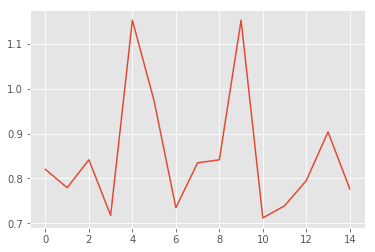

In [71]:
plt.plot([optimal['began']['mnist']['Jensen-Shannon']['mean'][idx] for idx, _ in enumerate(optimal['began']['mnist']['Jensen-Shannon']['mean']) if not is_outlier(np.array(optimal['began']['mnist']['Jensen-Shannon']['mean']))[idx]])

In [64]:
is_outlier(np.array(optimal['began']['mnist']['Jensen-Shannon']['mean']))

array([False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False])

In [69]:
is_outlier(np.array(optimal['began']['mnist']['Jensen-Shannon']['mean']))

array([False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False])

In [85]:
distributions = [
                 'normal',
                 'beta',
                 'exponential',
                 'gamma',
                 'gumbel',
                 'laplace',
                 ]

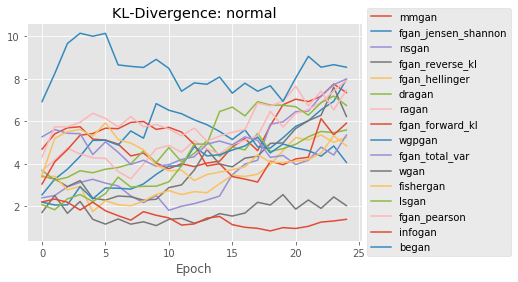

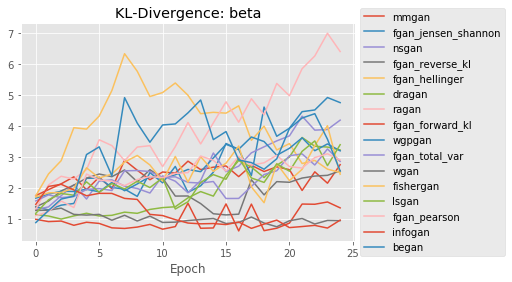

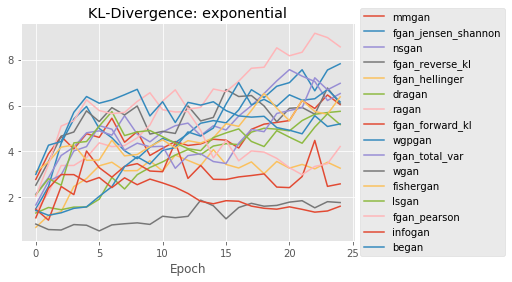

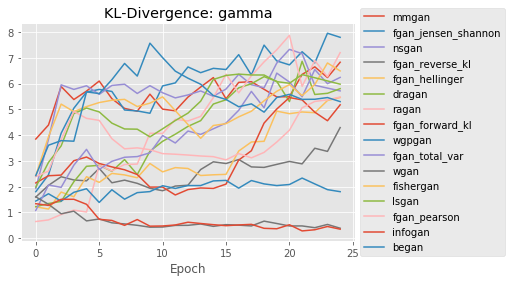

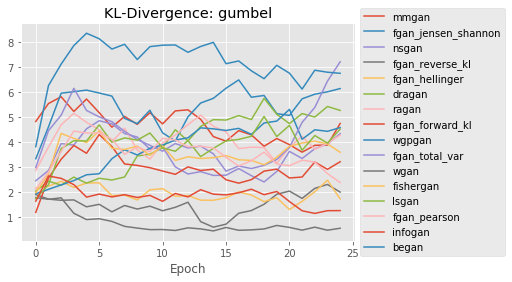

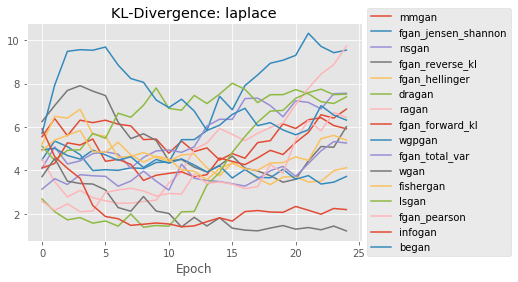

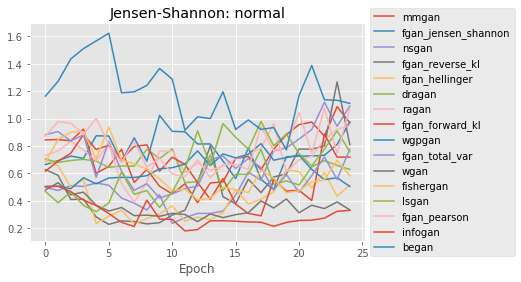

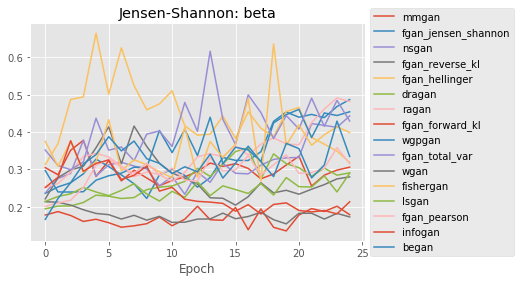

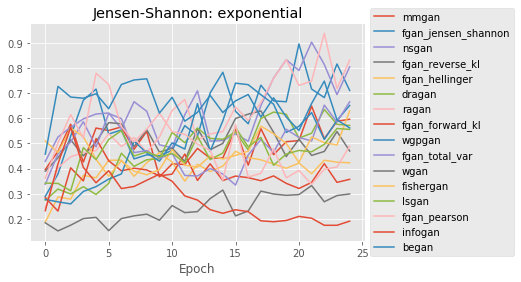

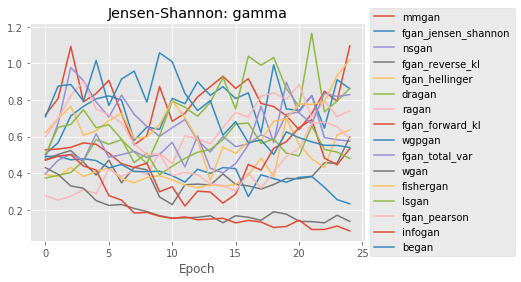

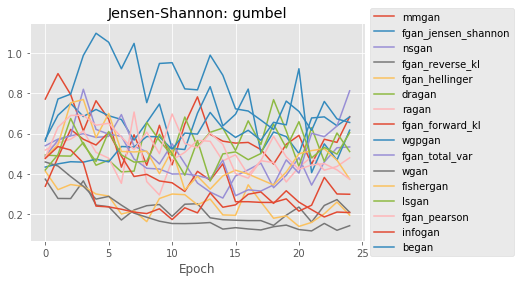

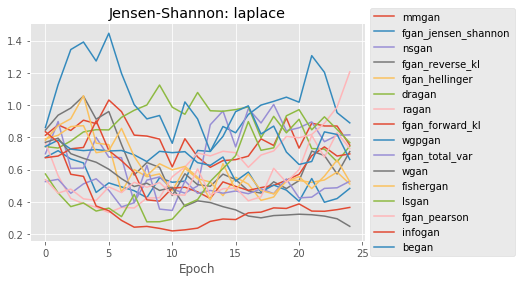

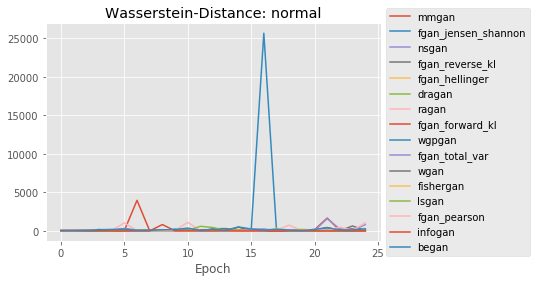

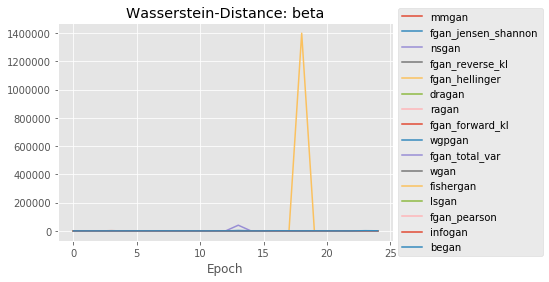

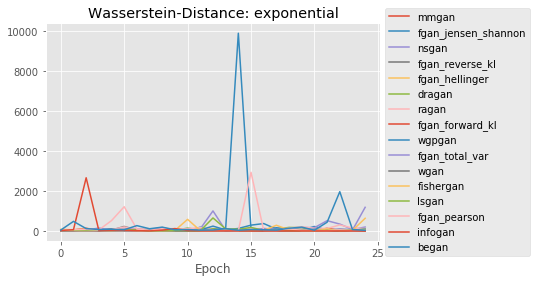

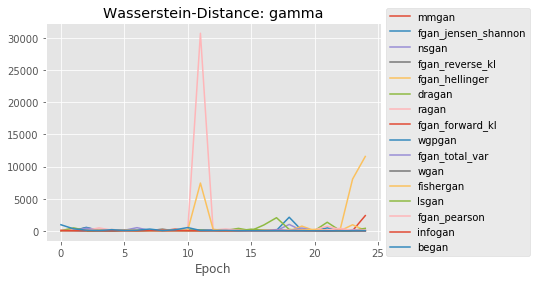

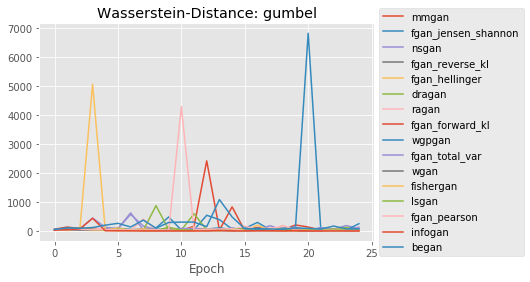

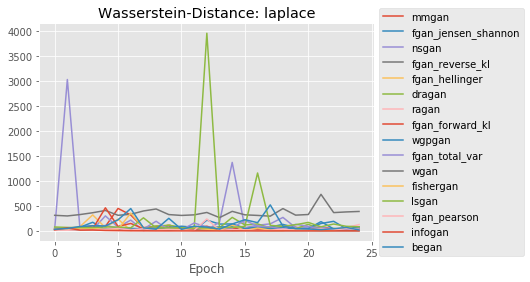

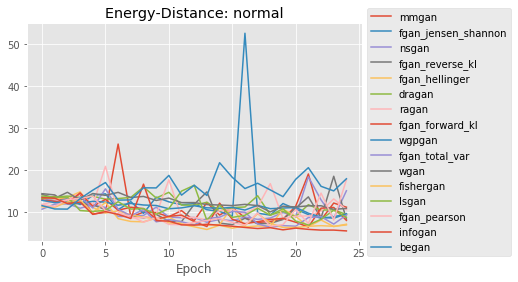

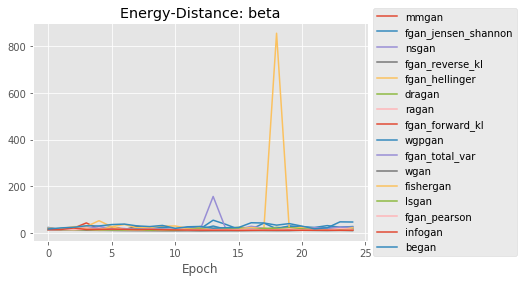

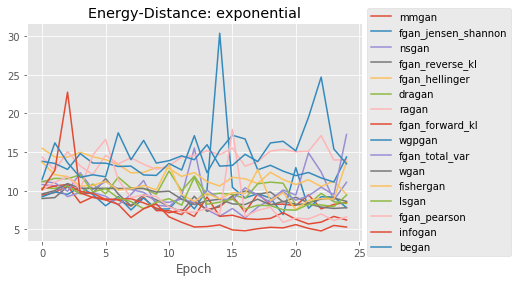

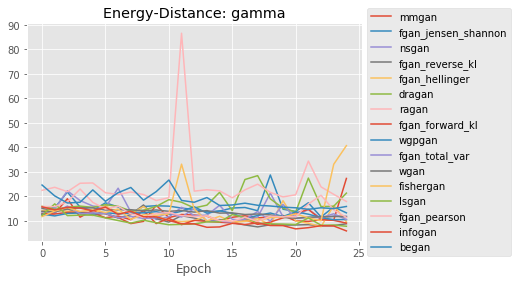

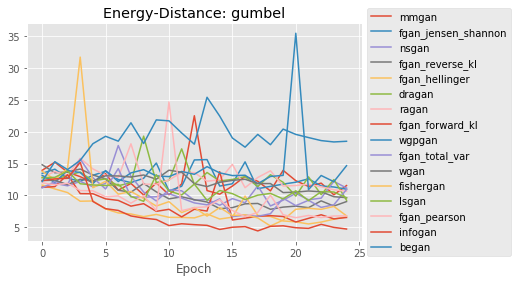

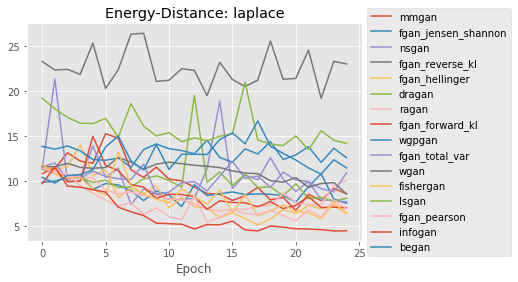

In [86]:
for div in distance_metrics:
    
    for dist in distributions:

        for model_name in data.keys():

            if model_name in ['vae', 'autoencoder']:
                continue

            plt.plot(range(len(data[model_name][dist][div])), 
                     data[model_name][dist][div], 
                     label=model_name)

            plt.xlabel("Epoch")
            plt.title("{0}: {1}".format(div, dist))
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #     plt.savefig('graphs/mnist/{1}.png'.format(dist), dpi=100)
        plt.show()